In [3]:
import tensorflow
from tensorflow import keras

In [4]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),
 (imagens_test, identificacoes_test)) = dataset.load_data()

In [5]:
imagens_treino

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
len(imagens_treino)

60000

In [7]:
imagens_treino.shape

(60000, 28, 28)

In [8]:
len(imagens_test)

10000

In [9]:
imagens_test.shape

(10000, 28, 28)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

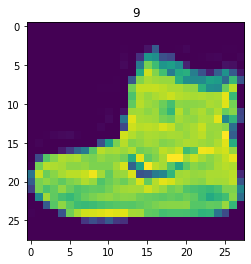

In [11]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

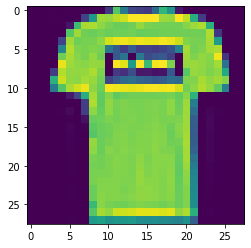

In [12]:
plt.imshow(imagens_treino[1])

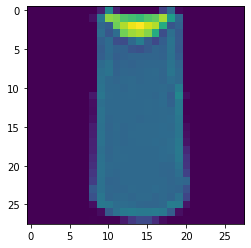

In [13]:
plt.imshow(imagens_treino[2])

In [14]:
print('Menor identificador: ', identificacoes_treino.min())
print('Maior identificador: ', identificacoes_treino.max())

Menor identificador:  0
Maior identificador:  9


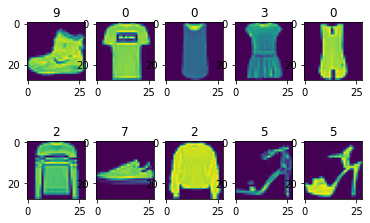

In [15]:
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(identificacoes_treino[imagem])

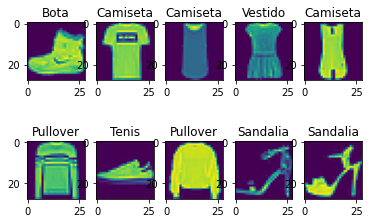

In [16]:
nomes_de_classificacoes = [
    'Camiseta', 'Calca', 'Pullover', 'Vestido', 'Casaco', 'Sandalia',
    'Camisa', 'Tenis', 'Bolsa', 'Bota'
]
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

In [17]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(64, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5,
           validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.9553 - accuracy: 0.7562 - val_loss: 0.5499 - val_accuracy: 0.8237
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5300 - accuracy: 0.8201 - val_loss: 0.5192 - val_accuracy: 0.8231
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4680 - accuracy: 0.8376 - val_loss: 0.4622 - val_accuracy: 0.8363
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4296 - accuracy: 0.8490 - val_loss: 0.4221 - val_accuracy: 0.8560
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4057 - accuracy: 0.8552 - val_loss: 0.3994 - val_accuracy: 0.8617


In [39]:
sumario_do_modelo = modelo.summary()
sumario_do_modelo

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
________________________________________________

In [41]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

In [42]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

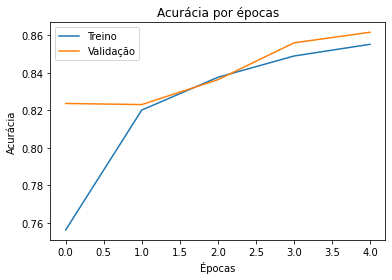

In [18]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

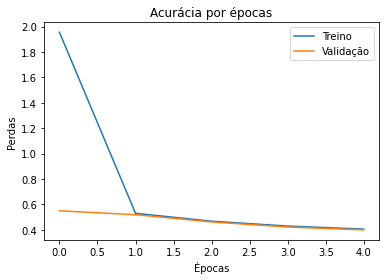

In [19]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

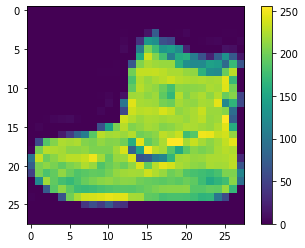

In [20]:
total_de_classificadores = 10
nomes_de_classificacoes = [
    'Camiseta', 'Calca', 'Pullover', 'Vestido', 'Casaco', 'Sandalia',
    'Camisa', 'Tenis', 'Bolsa', 'Bota'
]

plt.imshow(imagens_treino[0])
plt.colorbar()

In [21]:
teste = modelo.predict(imagens_test)

In [22]:
import numpy as np
print('Resultado teste', np.argmax(teste[0]))
print('Número da imagem de teste: ', identificacoes_test[0])

Resultado teste 9
Número da imagem de teste:  9


In [23]:
for i in range(1,5):
    print('Resultado teste', np.argmax(teste[i]))
    print('Número da imagem de teste: ', identificacoes_test[i])
    print('\n')

Resultado teste 2
Número da imagem de teste:  2


Resultado teste 1
Número da imagem de teste:  1


Resultado teste 1
Número da imagem de teste:  1


Resultado teste 6
Número da imagem de teste:  6




In [24]:
for i in range(50,55):
    print('Resultado teste', np.argmax(teste[i]))
    print('Número da imagem de teste: ', identificacoes_test[i])
    print('\n')

Resultado teste 4
Número da imagem de teste:  4


Resultado teste 2
Número da imagem de teste:  4


Resultado teste 5
Número da imagem de teste:  5


Resultado teste 8
Número da imagem de teste:  8


Resultado teste 2
Número da imagem de teste:  2




In [25]:
perda_test, acuracia_test = modelo.evaluate(imagens_test, identificacoes_test)
print('Valor da perda no teste: %.4f ' % perda_test)
print('Valor da acuracia no teste: %.4f' % acuracia_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4187 - accuracy: 0.8544
Valor da perda no teste: 0.4187 
Valor da acuracia no teste: 0.8544


In [26]:
# alterando a quantidade de época de 5 para 10
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(64, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 10,
           validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.4960 - accuracy: 0.7572 - val_loss: 0.5582 - val_accuracy: 0.8148
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5020 - accuracy: 0.8251 - val_loss: 0.4750 - val_accuracy: 0.8320
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4479 - accuracy: 0.8411 - val_loss: 0.4439 - val_accuracy: 0.8447
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4223 - accuracy: 0.8496 - val_loss: 0.5043 - val_accuracy: 0.8288
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4001 - accuracy: 0.8587 - val_loss: 0.4267 - val_accuracy: 0.8569
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3791 - accuracy: 0.8645 - val_loss: 0.4234 - val_accuracy: 0.8578
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3690 - accuracy: 0.8686 - val_loss: 0.3797 - val_accuracy:

In [27]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [28]:
modelo.layers[1].get_weights()[0]

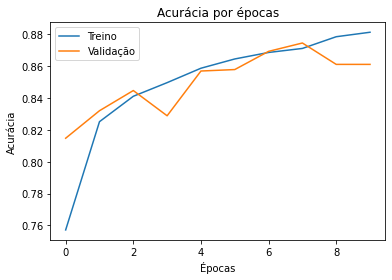

In [29]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

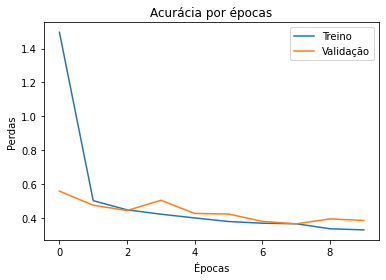

In [30]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

In [31]:
# realizando mais um teste de normalização
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(64, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5,
           validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 1.6184 - accuracy: 0.6073 - val_loss: 0.8446 - val_accuracy: 0.7104
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8018 - accuracy: 0.6877 - val_loss: 0.6519 - val_accuracy: 0.7194
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7188 - accuracy: 0.7155 - val_loss: 0.5680 - val_accuracy: 0.7906
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6510 - accuracy: 0.7522 - val_loss: 0.5921 - val_accuracy: 0.7987
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5888 - accuracy: 0.7843 - val_loss: 0.5058 - val_accuracy: 0.8281


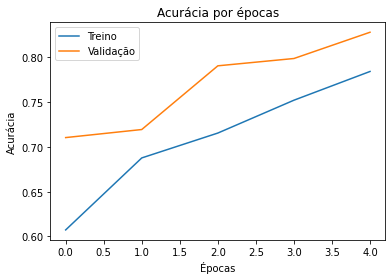

In [32]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

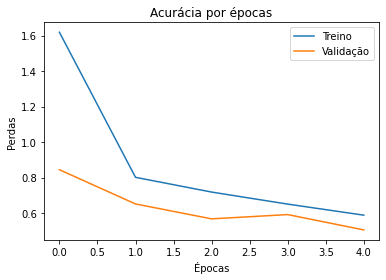

In [33]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

### podemos ver que o segundo modelo sai do overfiting

In [34]:
# salvando modelo
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [35]:
testes = modelo.predict(imagens_test)
testes_modelo_salvo = modelo_salvo.predict(imagens_test)
for i in range(1,5):
    print('Resultado teste: ', np.argmax(testes[i]))
    print('Número da imagem de teste: ', identificacoes_test[i])
    print('Resultado teste MODELO SALVO: ', np.argmax(testes_modelo_salvo[i]))
    print('Número da imagem de teste: ', identificacoes_test[i])
    print('\n')

Resultado teste:  2
Número da imagem de teste:  2
Resultado teste MODELO SALVO:  2
Número da imagem de teste:  2


Resultado teste:  1
Número da imagem de teste:  1
Resultado teste MODELO SALVO:  1
Número da imagem de teste:  1


Resultado teste:  1
Número da imagem de teste:  1
Resultado teste MODELO SALVO:  1
Número da imagem de teste:  1


Resultado teste:  6
Número da imagem de teste:  6
Resultado teste MODELO SALVO:  6
Número da imagem de teste:  6


